In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [12]:
# Loading data into numpy arrays
inp_paras = np.load('data/inp_paras_995.npy')
aoas_opt = np.load('data/aoas_opt_995.npy')
airfoils_opt = np.load('data/airfoils_opt_995.npy')

# Train Dataset - Inverse Design Parameters (Mach Number, Reynolds Number, Target Lift Coeffecient)
#print(inp_paras)
print(inp_paras.shape)

# Train Dataset - optimal angle of attacks
#print(aoas_opt)
print(aoas_opt.shape)

# Testing Dataset ?
#print(airfoils_opt)
print(airfoils_opt.shape)

(995, 3)
(995,)
(995, 192, 2)


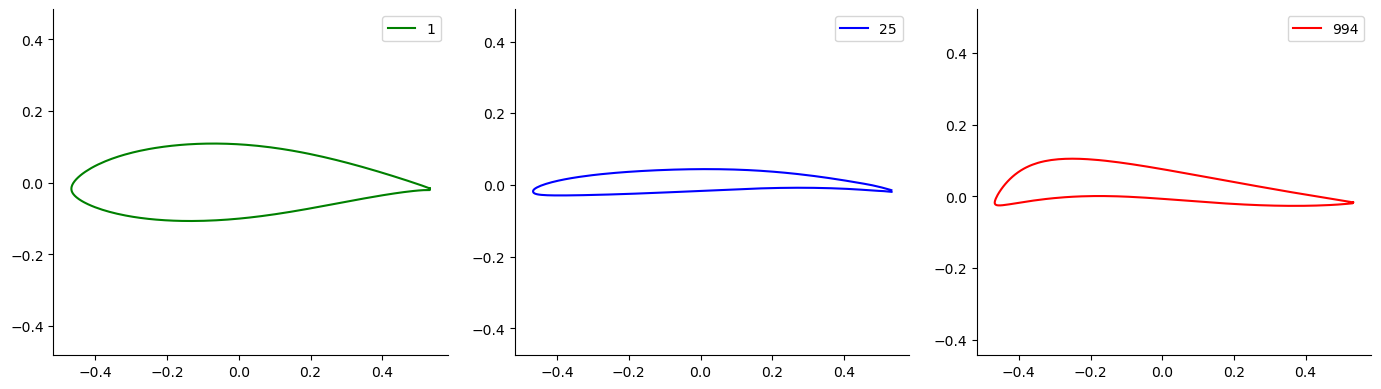

In [13]:
%matplotlib inline
# Centering the airfoils
airfoils_opt[:, :, 0] -= airfoils_opt[:, :, 0].mean()
airfoils_opt[:, :, 1] -= airfoils_opt[:, :, 1].mean()

fig, axs = plt.subplots(1,3,figsize=(14,4))

# Plotting testing airfoils
airfoil_id = 1
axs[0].plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='green')

airfoil_id = 25
axs[1].plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='blue')

airfoil_id = 994
axs[2].plot(airfoils_opt[airfoil_id,:,0],airfoils_opt[airfoil_id,:,1], label = airfoil_id, color='red')
axs[0].axis('equal')
axs[1].axis('equal')
axs[2].axis('equal')
axs[1].legend()
axs[2].legend()
axs[0].legend()


axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

axs[2].spines["top"].set_visible(False)
axs[2].spines["right"].set_visible(False)

fig.subplots_adjust(right=2.8)

plt.tight_layout()
plt.show()


In [14]:
# Creating dataframe design parameters

df = pd.DataFrame(inp_paras,columns=['Target Lift Coeffecient','Reynolds Number', 'Mach Number'])
df['Angle of Attack'] = aoas_opt
df.head()
#print(df['Mach Number'].max())


,Target Lift Coeffecient,Reynolds Number,Mach Number,Angle of Attack
0,0.50,19037683.0,1.03,3.247102
1,0.28,89729841.0,1.38,7.116804
2,0.29,61590231.0,1.18,5.523042
3,0.47,19084287.0,1.34,5.477172
4,0.49,72817353.0,1.29,4.981931


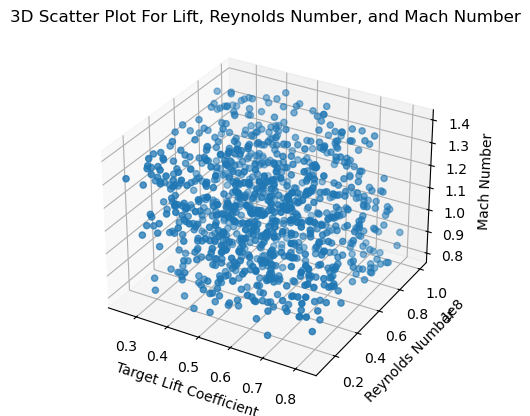

In [15]:
fig = plt.figure()
 
# 3D projection
ax = plt.axes(projection ='3d')
 
x = inp_paras[:,0]
y = inp_paras[:,1]
z = inp_paras[:,2]
ax.scatter(x, y, z)
 
# syntax for plotting
ax.set_title('3D Scatter Plot For Lift, Reynolds Number, and Mach Number')

ax.set_xlabel('Target Lift Coefficient')
ax.set_ylabel('Reynolds Number')
ax.set_zlabel('Mach Number')

plt.show()

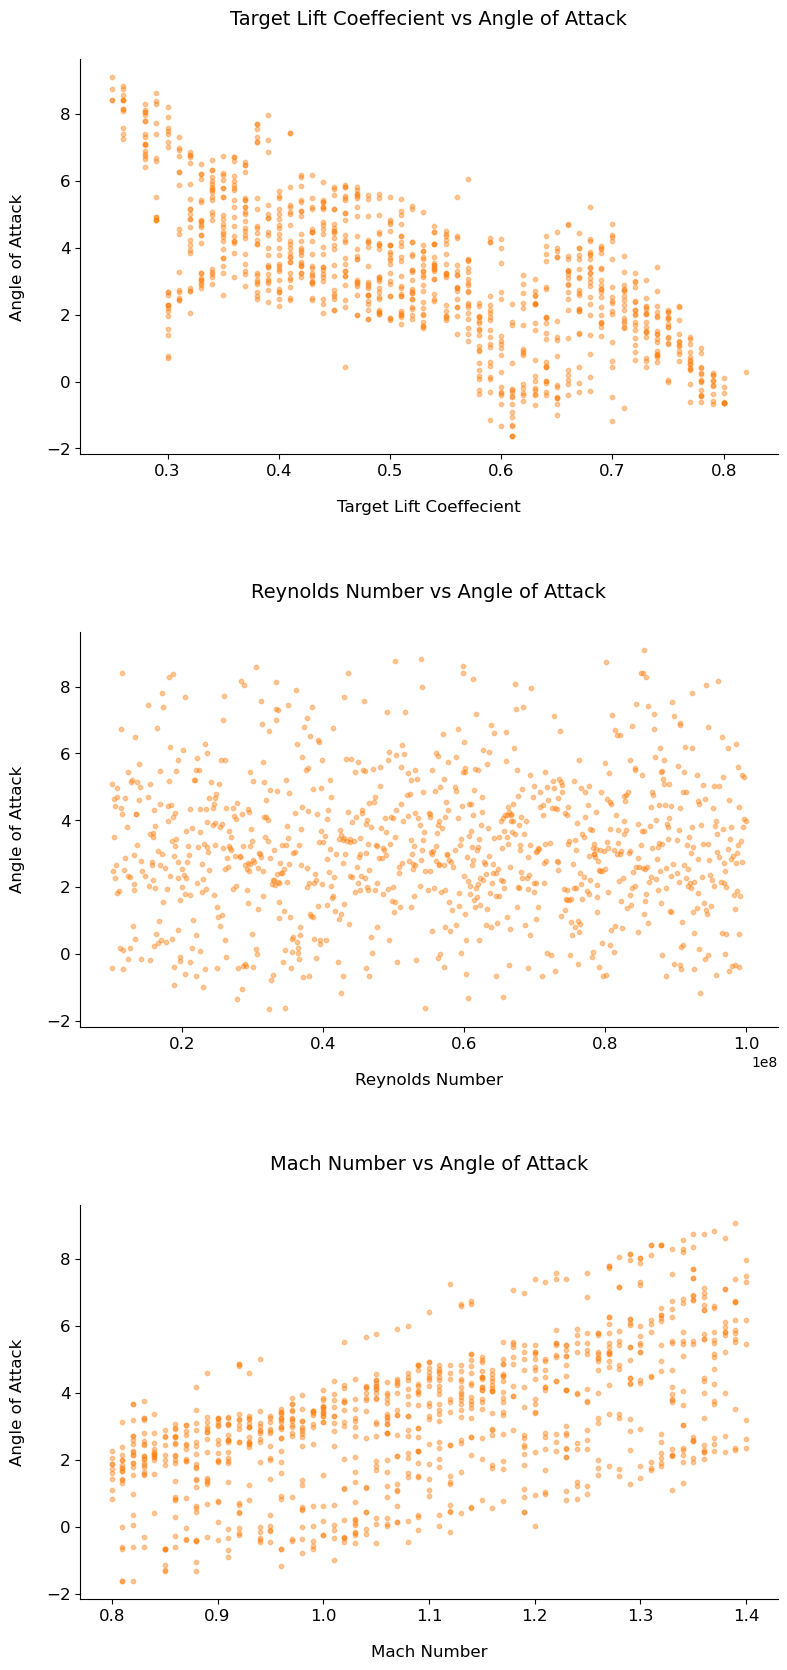

In [16]:
# Plotting design parameters against airfoil angle of attacks
fig, axs = plt.subplots(3,1,figsize=(9, 20))
column_names = df.columns.tolist()
axes_flat = axs.flatten()

for i,ax in enumerate(axes_flat):
    ax.scatter(df[column_names[i]], df[column_names[-1]], s=10,alpha=0.4,c='tab:orange')
    ax.set_xlabel(f"{column_names[i]}", fontsize = 12,labelpad =15)
    ax.set_ylabel(f"{column_names[-1]}", fontsize = 12, labelpad =15)
    ax.set_title(f"{column_names[i]} vs {column_names[-1]}",fontsize = 14,pad = 25)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

fig.subplots_adjust(hspace=.45)
plt.show()

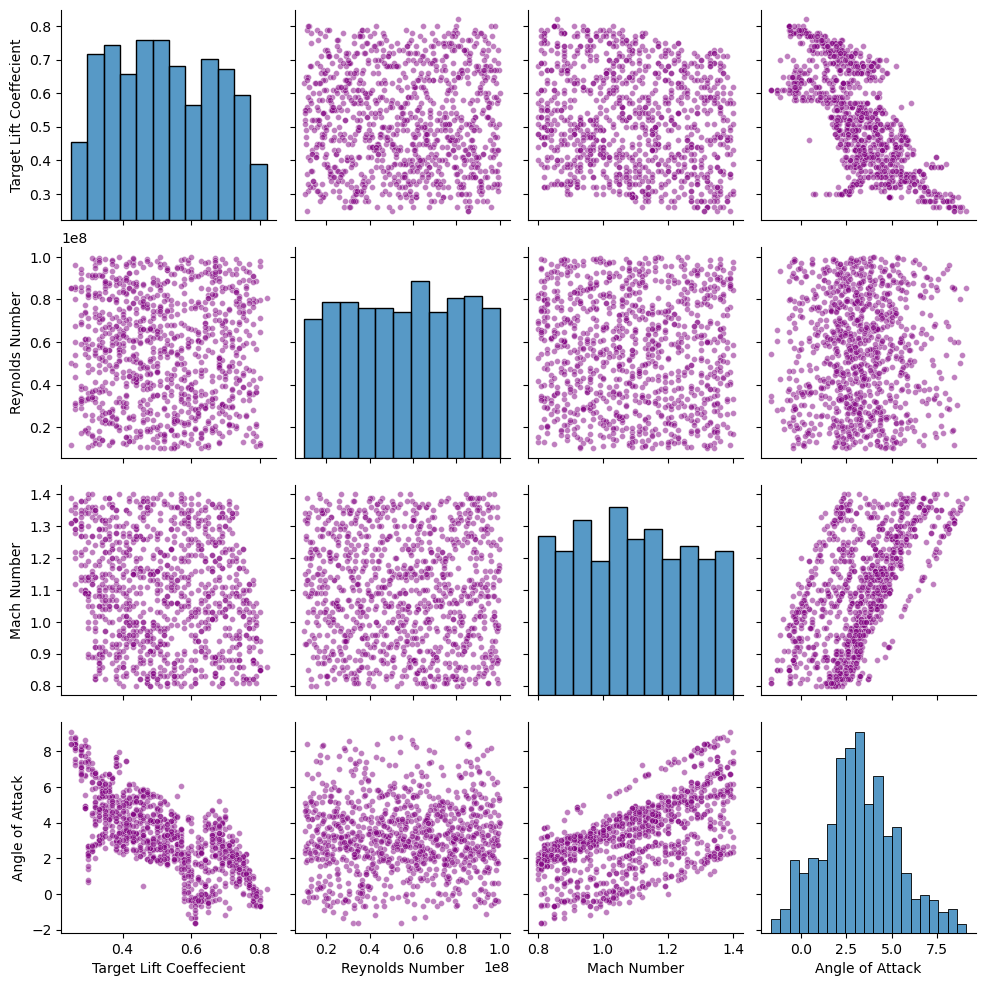

In [17]:
# Plotting scatter grid plot of all variables
sns.pairplot(df, plot_kws=dict(marker="o",s=18,alpha=0.5,linewidth=0.4,color='purple'))
plt.show()

In [18]:

airfoils_opt_new = airfoils_opt.reshape(airfoils_opt.shape[0], -1)
print(airfoils_opt_new.shape)

(995, 384)


Number of Target Latent Components: 12


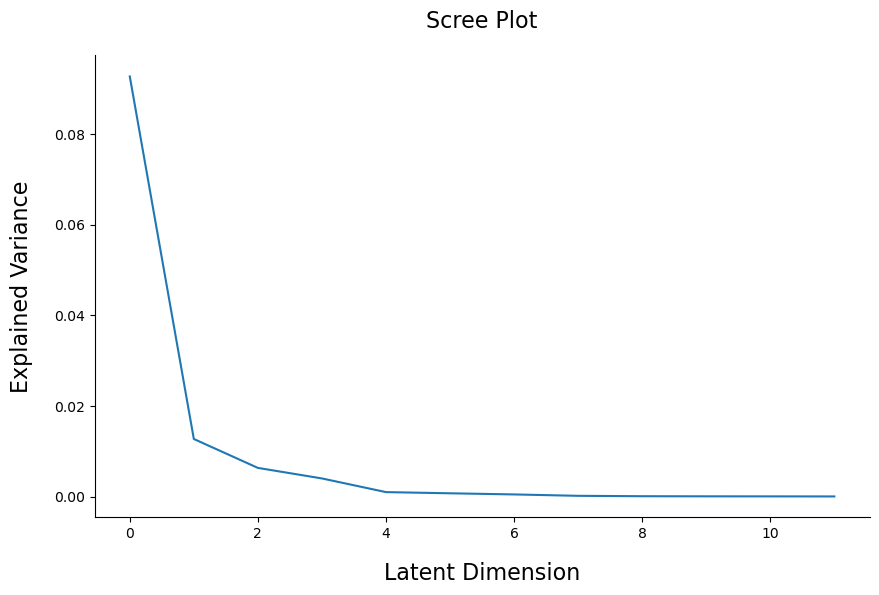

In [25]:
#airfoils_opt_new = airfoils_opt_new.to_numpy()
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

n_components = 12
print("Number of Target Latent Components:", n_components)
estimator = decomposition.PCA(n_components=n_components)
estimator.fit(airfoils_opt_new)
components_ = estimator.components_

plt.plot(estimator.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Latent Dimension")


plt.xlabel("Latent Dimension", fontsize=16, labelpad=15)
plt.ylabel("Explained Variance", fontsize=16, labelpad=15)
plt.title("Scree Plot", fontsize=16, pad=20)
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
plt.show()